### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import  train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
from mlxtend.plotting import plot_decision_regions

In [2]:
df1=pd.read_csv(r"D:\Multiple CSV\Multiple CSV\4.linearsep.csv",header=None)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [3]:
df1[2]=df1[2].astype("int32")
df1[2].unique()


array([1, 0])

In [4]:
fv=df1.iloc[:,:2]
cv=df1.iloc[: ,-1]

In [5]:
cv

0     1
1     0
2     0
3     1
4     1
     ..
95    0
96    1
97    1
98    0
99    1
Name: 2, Length: 100, dtype: int32

In [6]:
knn=KNeighborsClassifier(n_neighbors=30)

<Axes: >

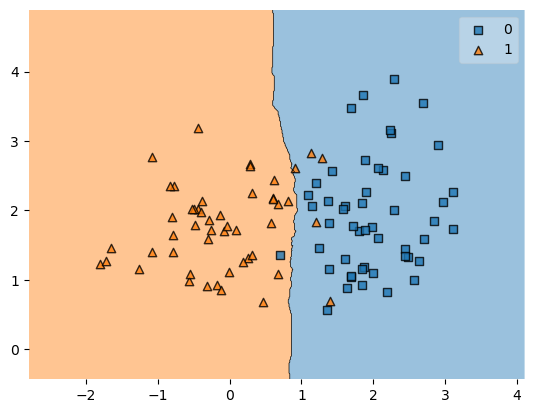

In [7]:
knn.fit(fv,cv)
plot_decision_regions(X=fv.values,y=cv.values,clf=knn)

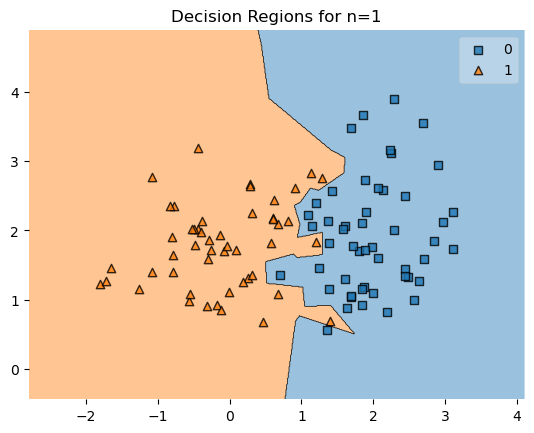

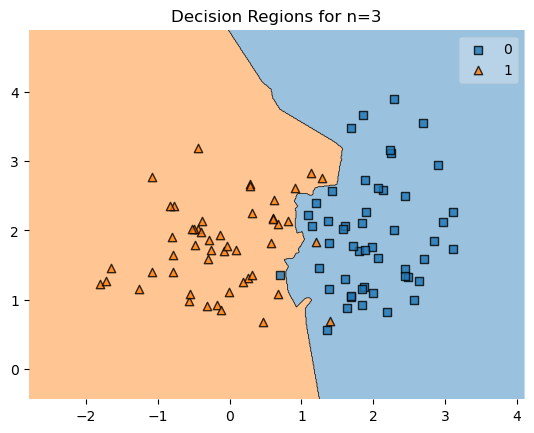

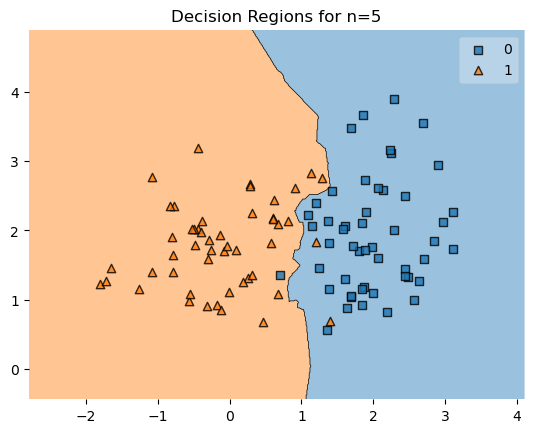

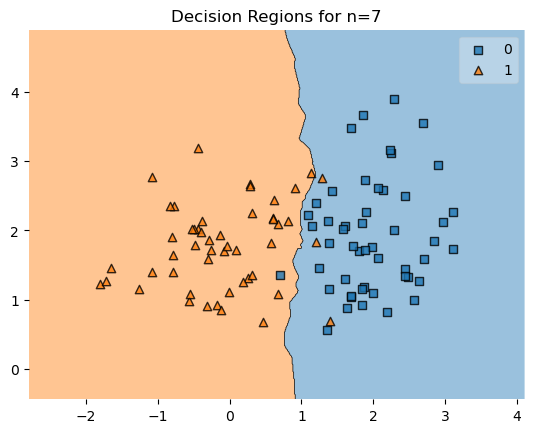

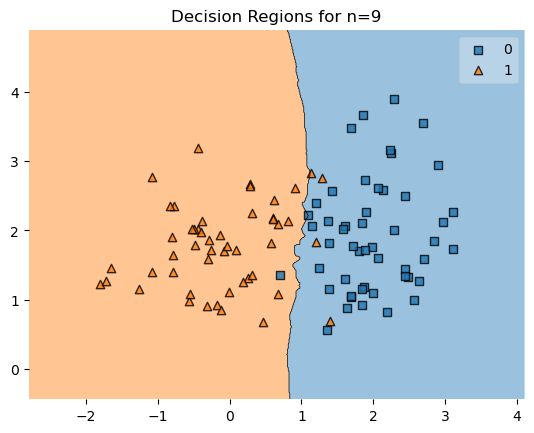

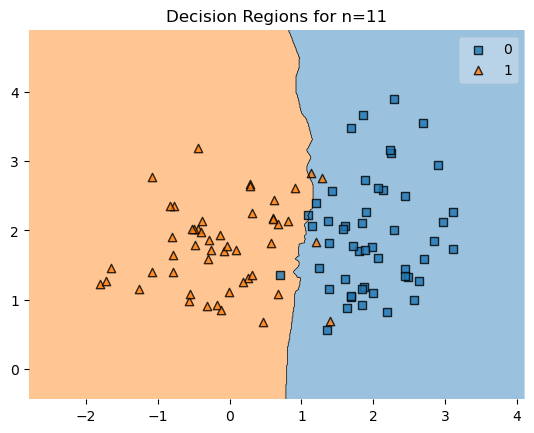

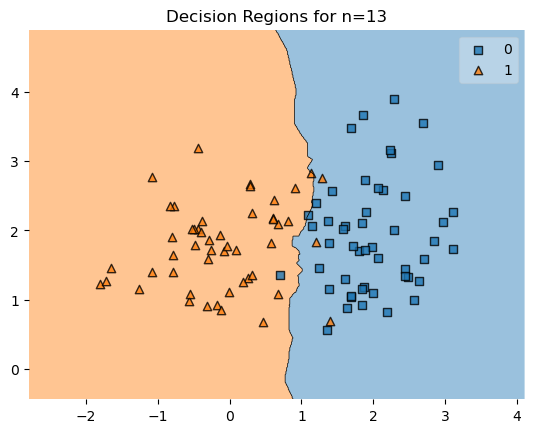

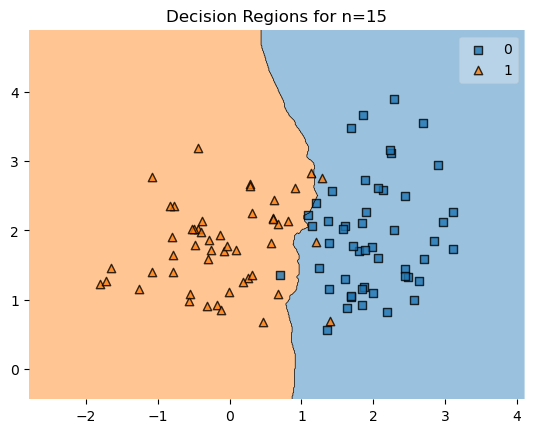

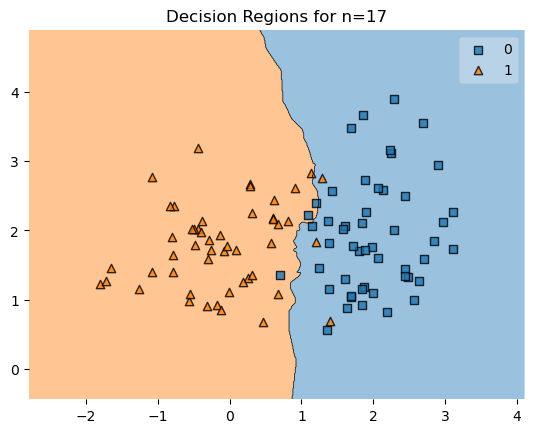

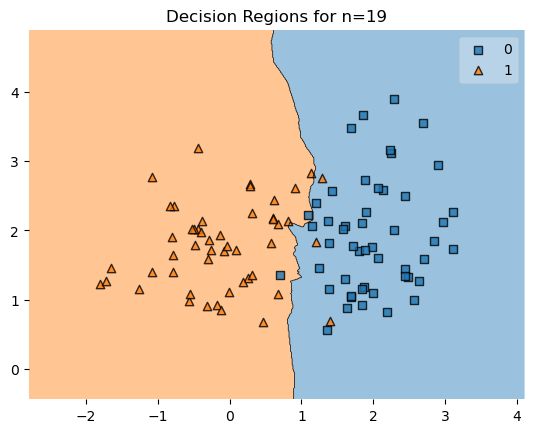

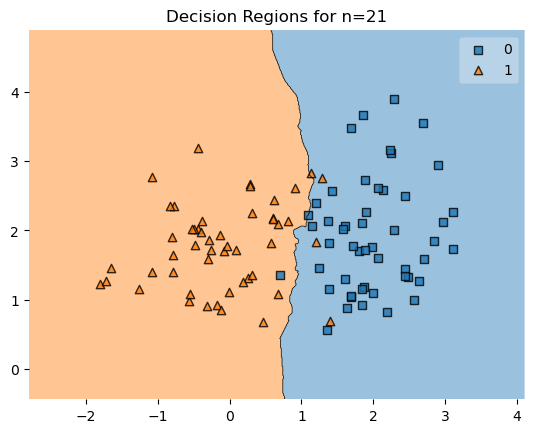

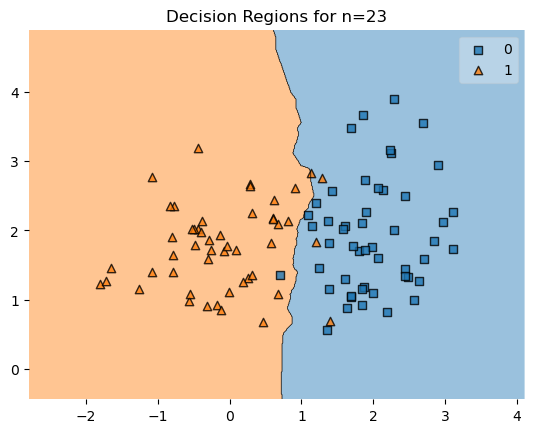

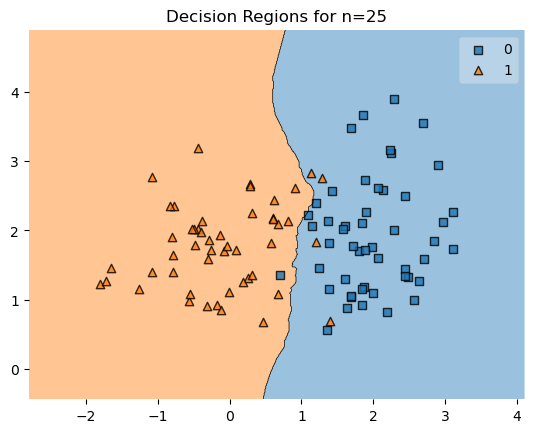

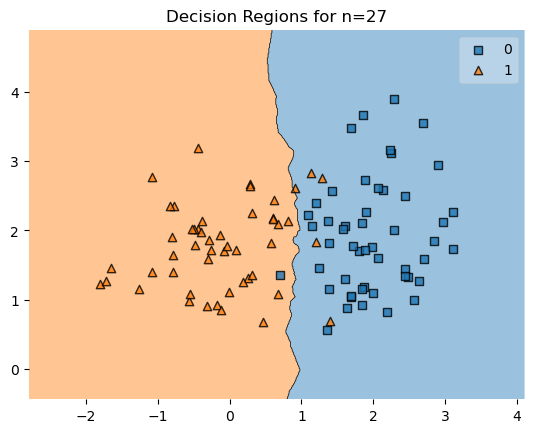

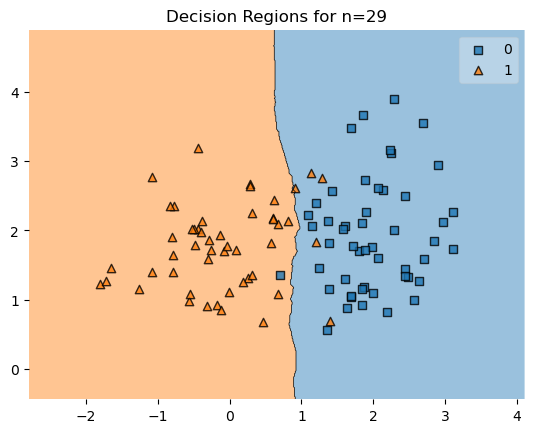

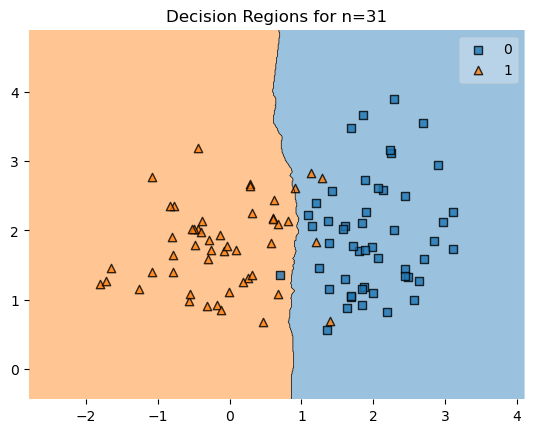

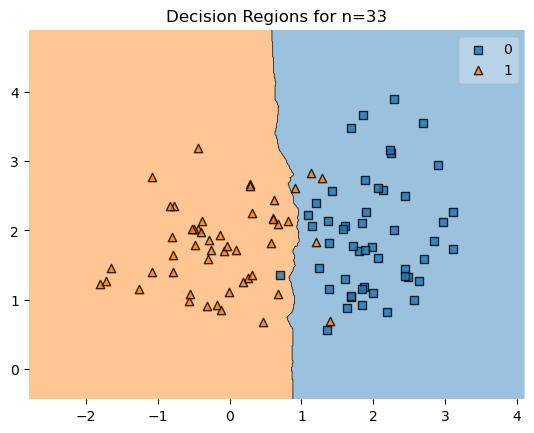

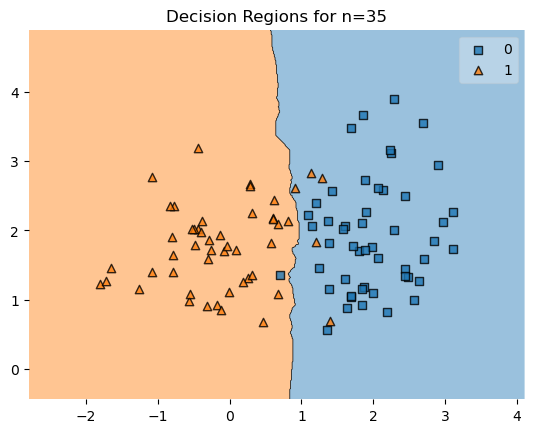

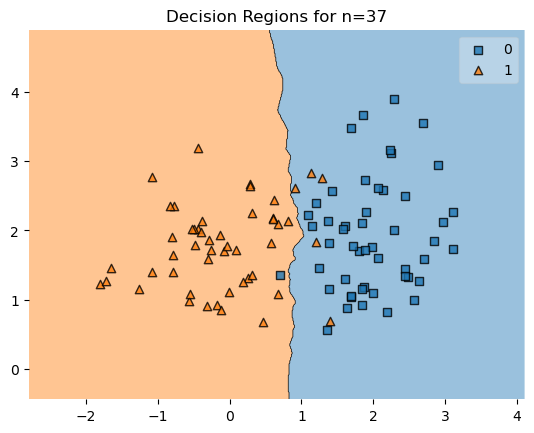

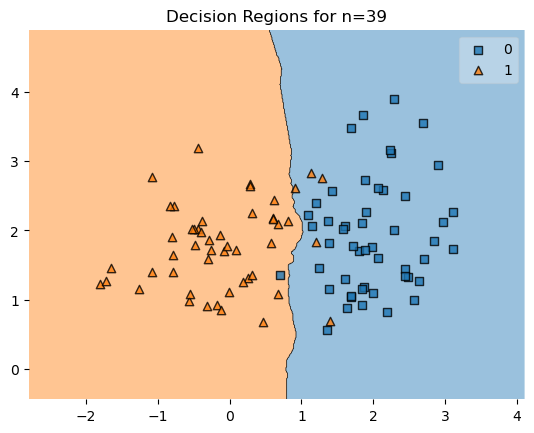

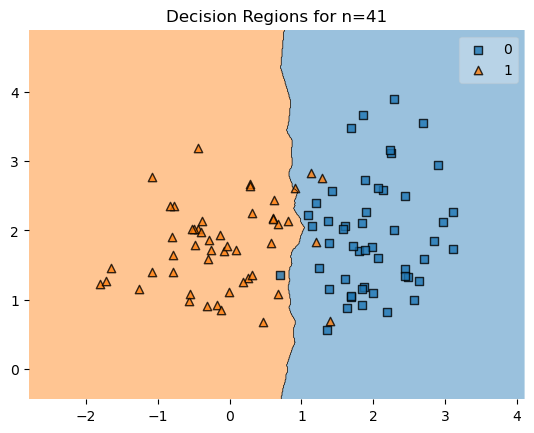

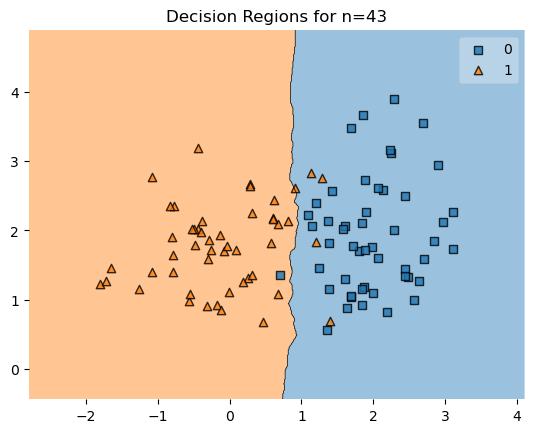

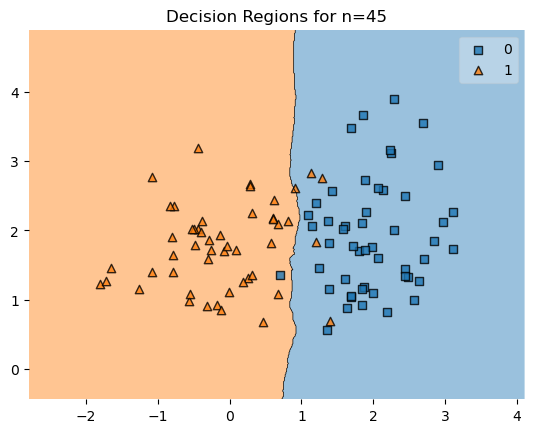

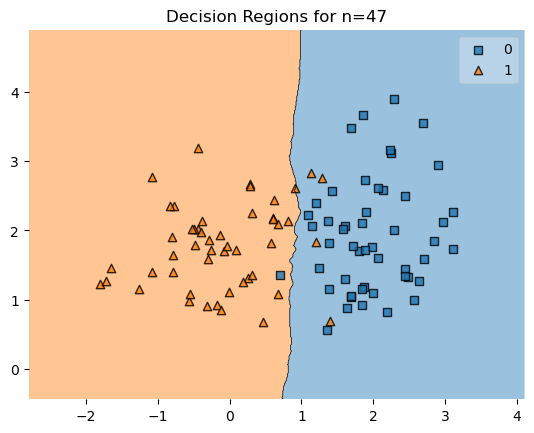

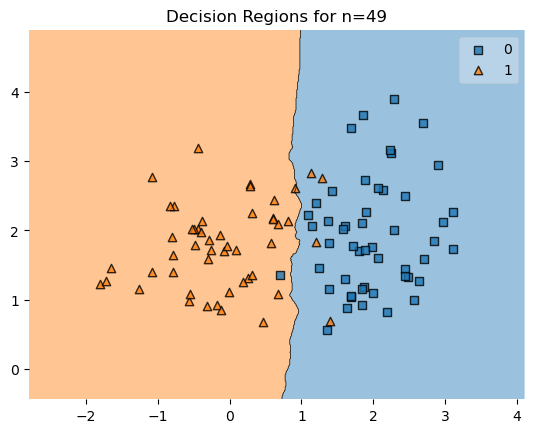

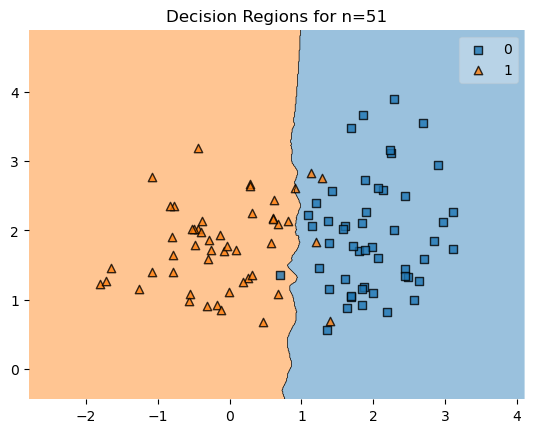

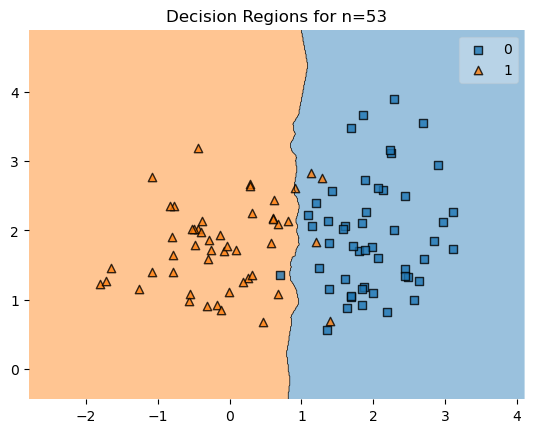

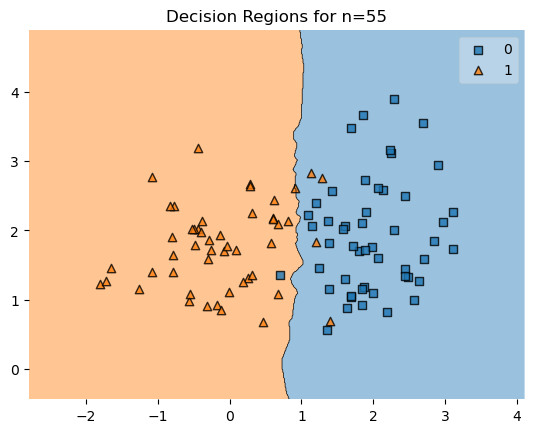

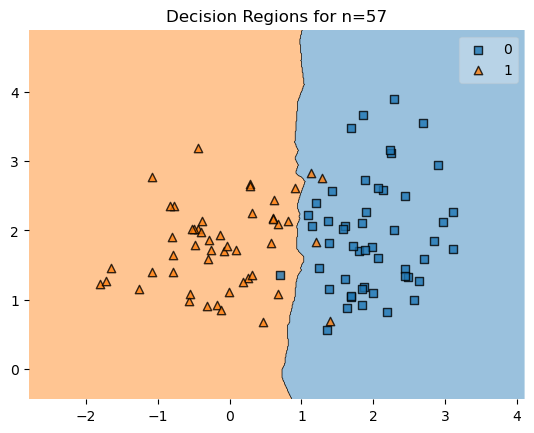

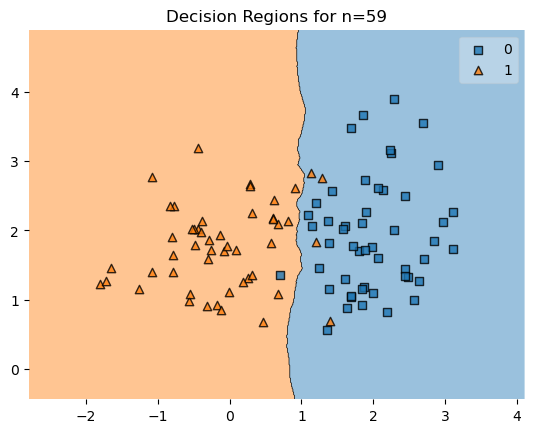

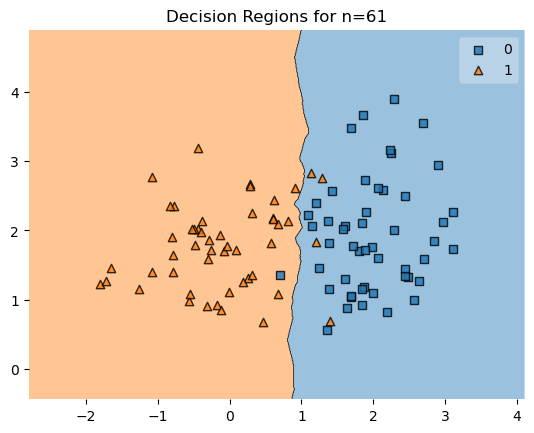

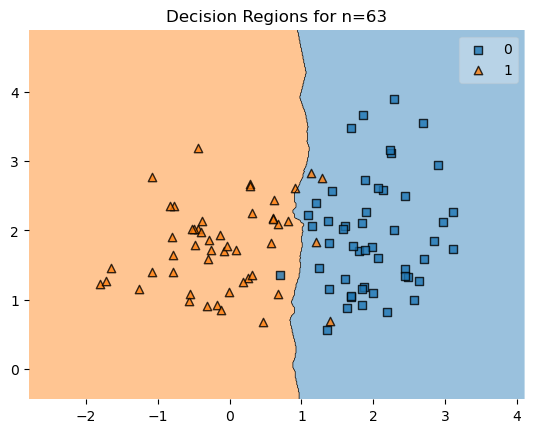

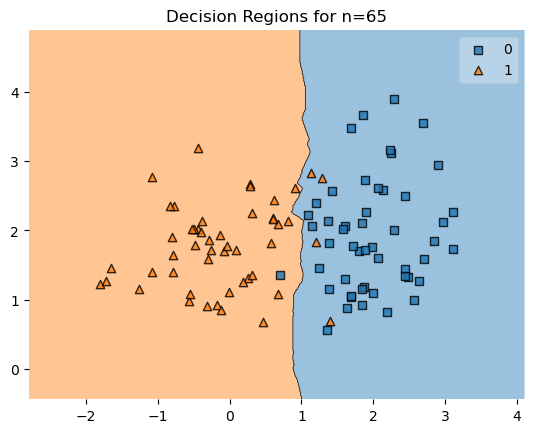

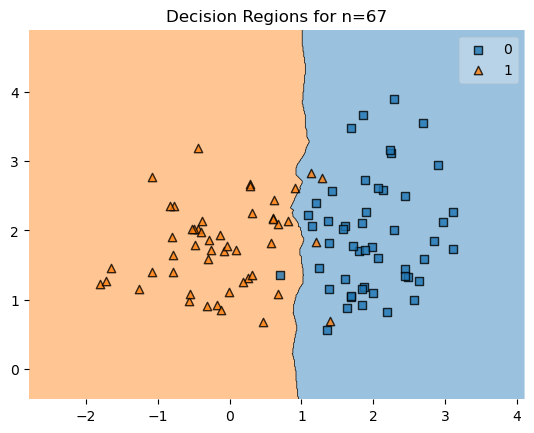

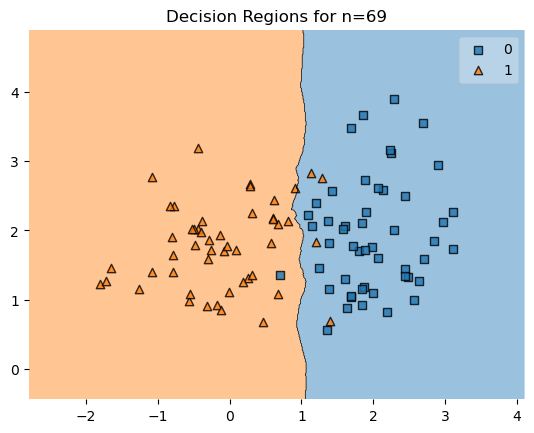

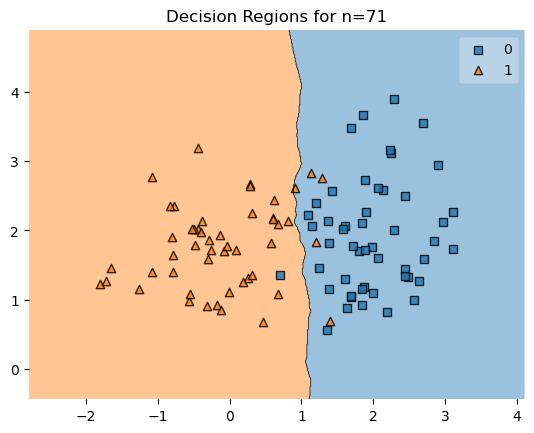

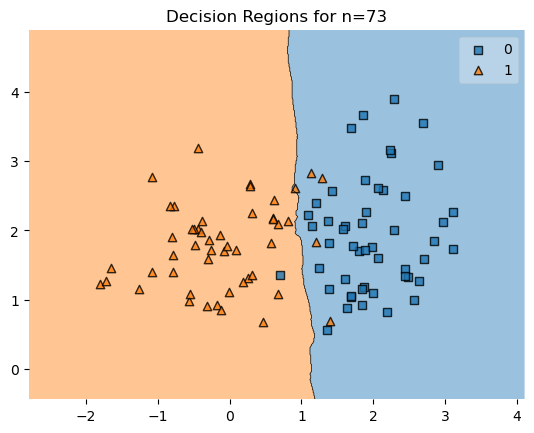

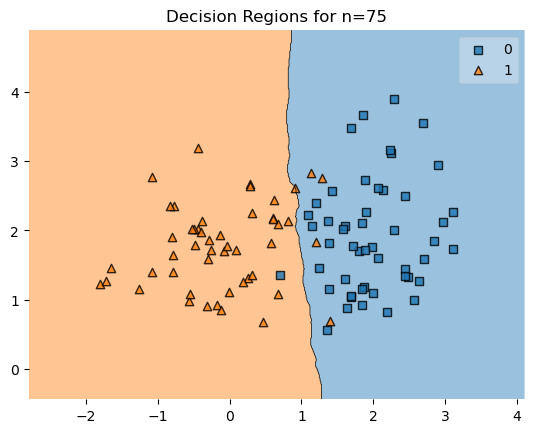

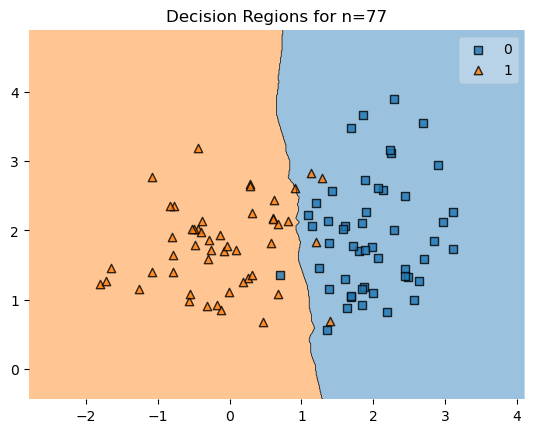

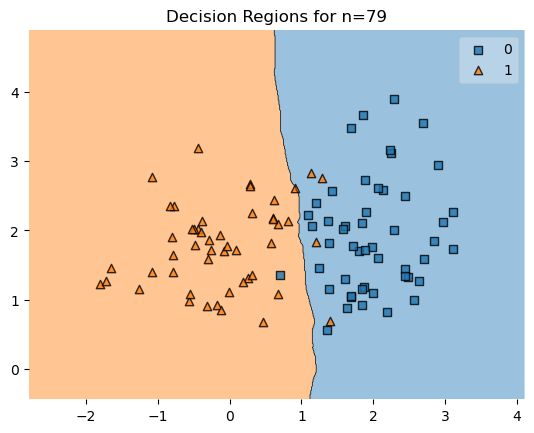

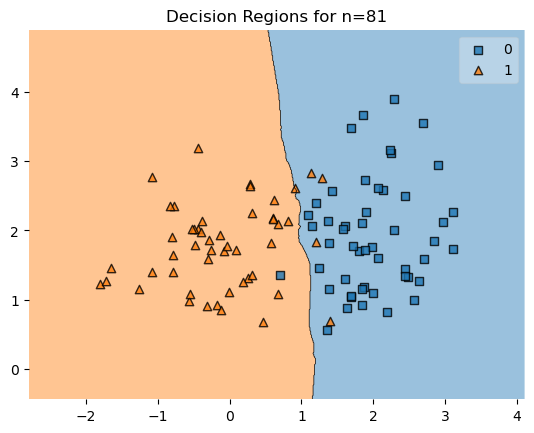

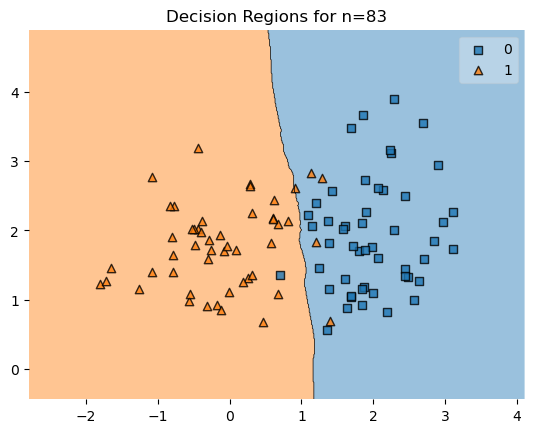

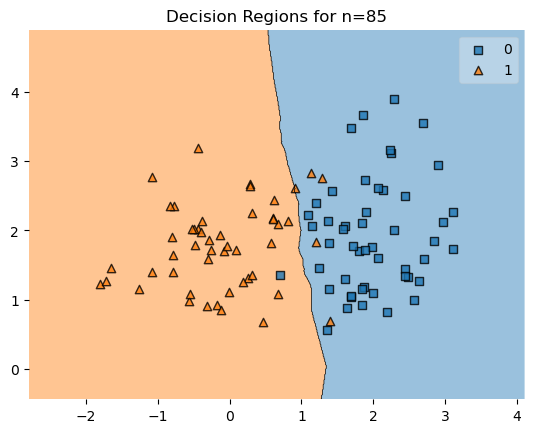

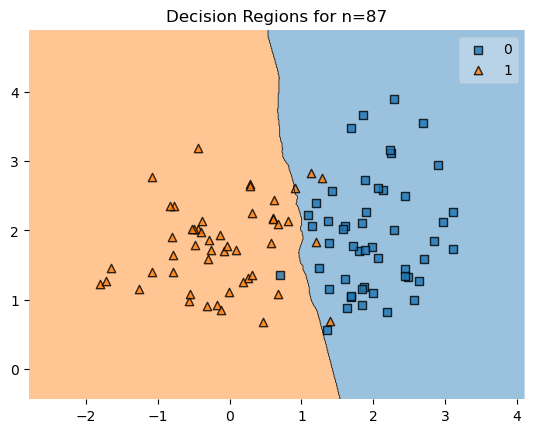

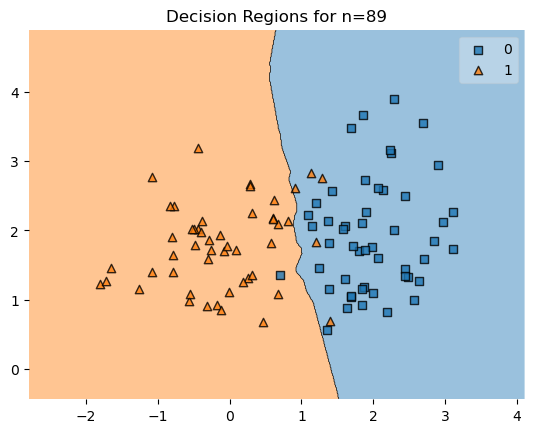

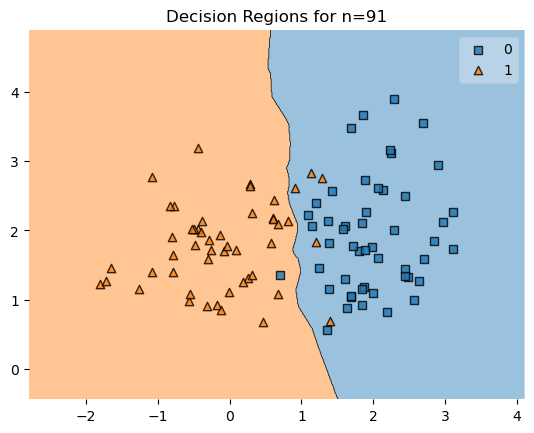

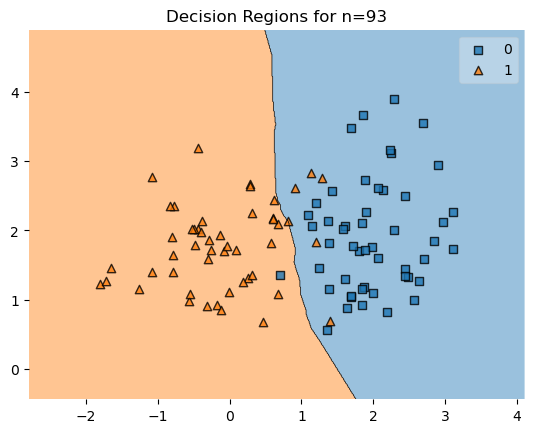

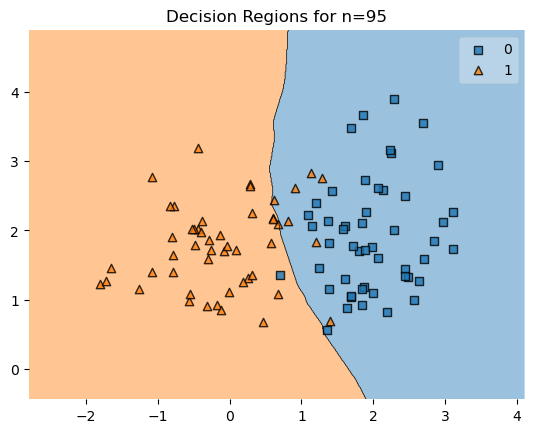

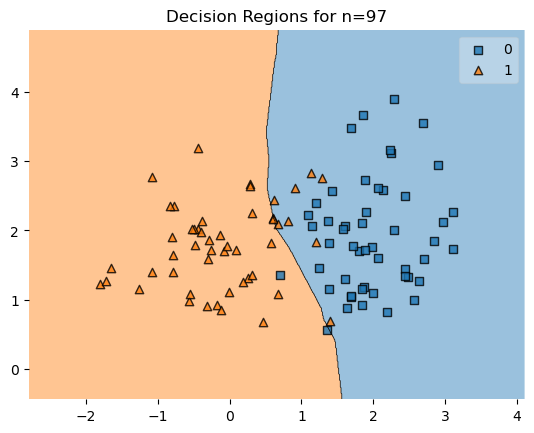

In [8]:
for n in range(1,99,2):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(fv,cv)
    plot_decision_regions(X=fv.values,y=cv.values,clf=knn)
    plt.title(f'Decision Regions for n={n}')
    plt.show()

In [9]:
df1=pd.read_csv(r"D:\Multiple CSV\Multiple CSV\1.ushape.csv",header=None)
fv=df1.iloc[:,:2]
cv=df1.iloc[: ,-1]
df1.head()


,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [10]:
X_train,X_test,y_train,y_test=train_test_split(fv,cv,test_size=0.2,random_state=42,stratify=cv)
knn=KNeighborsClassifier(n_neighbors=1)
model=knn.fit(X_train,y_train)
predicted=model.predict(X_test)

In [11]:
x_trinf,x_testf,cv_train,cv_test=train_test_split(X_train,y_train,test_size=0.1,random_state=42,stratify=y_train)

In [12]:
k=[]
acc=[]
err=[]
for n in range(1,95,2):
    knn=KNeighborsClassifier(n_neighbors=n)
    model=knn.fit(x_trinf,cv_train)
    predicted=model.predict(x_testf)

    k.append(n)
    acc.append(accuracy_score(cv_test,predicted))
    err.append(1-accuracy_score(cv_test,predicted))

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [ ]:

x_trinf = np.ascontiguousarray(x_trinf)
cv_train = np.ascontiguousarray(cv_train)
x_testf = np.ascontiguousarray(x_testf)

In [ ]:
k=[]
acc=[]
err=[]
for n in range(1,73,2):
    knn=KNeighborsClassifier(n_neighbors=n)
    model=knn.fit(x_trinf,cv_train)
    predicted=model.predict(x_testf)

    k.append(n)
    acc.append(accuracy_score(cv_test,predicted))
    err.append(1-accuracy_score(cv_test,predicted))

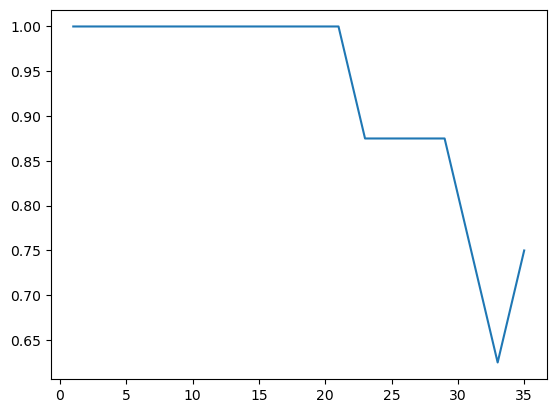

In [13]:
plt.plot(k,acc)
plt.show()

In [14]:
### select one from most accuray k value 

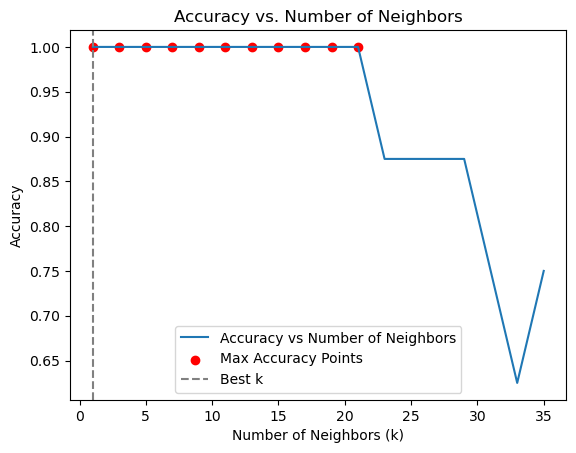

In [15]:
max_acc_indices = [i for i, j in enumerate(acc) if j == max(acc)]

# Plotting the graph
plt.plot(k, acc, label='Accuracy vs Number of Neighbors')
plt.scatter([k[i] for i in max_acc_indices], [acc[i] for i in max_acc_indices], color='red', marker='o', label='Max Accuracy Points')
plt.axvline(x=k[max_acc_indices[0]], color='gray', linestyle='--', label='Best k')  # Assuming the first max index for vertical line

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.legend()
plt.show()